### Date and Time data Types and Tools

The Python standard library includes data types for date and time data, as well as calendar-related functionality.

The `datetime.time`, and `calendar` modules are the main places to start.

In [54]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
now = datetime.now()
now

datetime.datetime(2018, 7, 24, 14, 10, 57, 408383)

In [3]:
print(now.year, now.month, now.day)

2018 7 24


`datetime` store both the date and time down to the microsecond.

`datetime.timedelta` represents the temproal different two datetime objects. 

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [5]:
print("different day: %s, different second: %s" % (delta.days, delta.seconds))

different day: 926, different second: 56700


### `timedelta`

You can add(or subtract) a `timedelta` or multiple thereof to a `datetime` object to yield a new shifted object.

### Types in datetime module

Types         | Description                                                                                | 
--------------|:------------------------------------------------------------------------------------------:|
**`date`**        | Store calendar date(year, month, day) using the Gregorian calendar                         |
**`time`**        | Store time of days as hours, minutesm and microseconds                                     |
**`datetime`**    | Stroes  both date and time                                                                 |
**`timedelta`**   | Represents the difference between two datetime values(as days, secondsm and microsenconds) | 

In [6]:
from datetime import timedelta

In [9]:
start = datetime(2011, 1, 7)
start + timedelta(days = 3, hours = 3, minutes = 3, seconds = 12)

datetime.datetime(2011, 1, 10, 3, 3, 12)

In [10]:
start - 2 * timedelta(days = 12)

datetime.datetime(2010, 12, 14, 0, 0)

### Convert between string and  datetime

`datetime` objects and pandas `Timestamp` objects, which I'll introduce later, can be ***formatted as string using `str` or the `strftime` method***, passing a format specification.

`strftime`(string format output time)

***These same format codes can be used to convert strings to dates using `datetime.strptime`(new datetime parsed from a string).***

In [11]:
stamp = datetime(2013, 1, 3)
stamp

datetime.datetime(2013, 1, 3, 0, 0)

In [12]:
stamp.strftime("%Y-%m-%d")

'2013-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestr = ["7/6/2011", '8/6/2011']
[datetime.strptime(x, "%m/%d/%Y") for x in datestr]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

***`datetime.strptime` is the best way to parse a date with a known format.***

However, it can be a bit annoying to have to write a format spec each time, especially date formats.

***You can use the `parser.parse` method in the third party `dateutil` package.***

***`dateutil` is capable of parsing almost an human-intelligible date represention.***

In [2]:
from dateutil.parser import parse

In [17]:
parse("2011-01-03")

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In international locales, day appearing before month is very common, so you can pass `dayfirst = True` to indicate this.

In [19]:
parse("6/12/2011", dayfirst = True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame.

***The `to_datetime` method parses many different kinds of date representayions.***

In [3]:
import pandas as pd

In [31]:
datestr = ["7/6/2011", '8/6/2011']
pd.to_datetime(datestr)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

***`dateutil.parser.parse` method get `datetime` object, then use `strftime` method output specified format.****

In [67]:
[parse(date).strftime("%Y-%m-%d") for date in datestr]

['2011-07-06', '2011-08-06']

***Using `parse` method can parse string of the diffent datetime format.***

In [32]:
temp = ["12/6/2016", "2016-08-06"]

In [33]:
[parse(date).strftime("%Y-%m-%d") for date in temp]

['2016-12-06', '2016-08-06']

***`NaT`*** (Not a Time) is pandas's NA value for timestamp data.

In [34]:
idx = pd.to_datetime(datestr + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [35]:
print(idx[2]) 
print(pd.isnull(idx))

NaT
[False False  True]


### Time Series Basics

The most basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or `datetime` object.

In [21]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [30]:
ts = pd.Series(data = np.random.randn(6), index = dates)
ts[-3:]

2011-01-08   -0.491852
2011-01-10    0.755731
2011-01-12   -0.269942
dtype: float64

In [32]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

***Like other Series, arithmetic operations between differently-indexed time series automatically align on the dates.***

A timestamp can be substituted anywhere you would use a `datetime` object.

***Additionally, it can store frequency information(if any) and understands how time zone conversions and other kinds of maniplations.***

In [37]:
print(ts)
ts + ts[::2]

2011-01-02    1.926968
2011-01-05    0.917687
2011-01-07   -1.577411
2011-01-08   -0.491852
2011-01-10    0.755731
2011-01-12   -0.269942
dtype: float64


2011-01-02    3.853935
2011-01-05         NaN
2011-01-07   -3.154821
2011-01-08         NaN
2011-01-10    1.511462
2011-01-12         NaN
dtype: float64

In [44]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subseting

***As a convenience, you can also pass a string that is interpretable as a date.***

For longer time series, a year or only a year and month can be passed to easily select of data.

In [45]:
stamp = ts.index[2]
ts[stamp]

In [49]:
print(ts['1/10/2011'])
print(ts['20110110'])

0.7557308282475597
0.7557308282475597


In [52]:
longer_ts = pd.Series(data = np.random.randn(1000), 
                      index = pd.date_range(start = '1/1/2000', periods = 1000))

In [55]:
print(len(longer_ts))
longer_ts[-5:]

1000


2002-09-22    1.252656
2002-09-23   -1.064926
2002-09-24   -0.721539
2002-09-25   -0.185273
2002-09-26    1.078833
Freq: D, dtype: float64

In [64]:
# You can just pass year or month to slice with data.
print('Select 2001 :', longer_ts['2001'][-3:])
print("-"*50)
print('Select 2001-5:', longer_ts['2001-05'][-3:])

Select 2001 : 2001-12-29    0.241518
2001-12-30   -0.598224
2001-12-31   -1.191834
Freq: D, dtype: float64
--------------------------------------------------
Select 2001-5: 2001-05-29    1.306188
2001-05-30   -0.326928
2001-05-31    0.496326
Freq: D, dtype: float64


***Slice with dataset works just like a regular Series.***

In [79]:
longer_ts[(longer_ts.index >= datetime(2000, 2, 1)) & (longer_ts.index <= datetime(2000, 2, 27))][-5:]

2000-02-23   -1.240447
2000-02-24    2.020742
2000-02-25   -0.809792
2000-02-26   -0.263999
2000-02-27    1.139657
Freq: D, dtype: float64

In [83]:
longer_ts[longer_ts.index < '2000-01-15'][-3:]

2000-01-12    0.651772
2000-01-13   -2.211338
2000-01-14   -1.038107
Freq: D, dtype: float64

In [85]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.577411
2011-01-08   -0.491852
2011-01-10    0.755731
dtype: float64

As before you can pass either a string data, datetime, ot Timestamp.

Remember that slicing this manner prodeces views on the source time series just like slicing NumPy array.

There is an equivalient instance method `truncate` which slices a TimeSeries between two dates.

In [87]:
ts.truncate(after = '2011-01-09')

2011-01-02    1.926968
2011-01-05    0.917687
2011-01-07   -1.577411
2011-01-08   -0.491852
dtype: float64

In [100]:
dates = pd.date_range(start = "1/1/2000", periods = 1000, freq = "W-WED")
long_df = pd.DataFrame(data = np.random.randn(1000, 4), 
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'],
                       index = dates)

In [104]:
long_df['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.764880,1.269698,-0.480698,0.219507
2001-05-09,1.712601,0.434580,1.346762,0.422147
2001-05-16,-0.031334,-0.630770,-1.098144,0.985377
2001-05-23,1.280701,-0.904474,-1.352312,-1.289253
2001-05-30,-0.710766,-0.377964,-0.739108,-1.221031


### Time Series with Duplicat Indices

In some applications, there may be multiple data observations falling on a particular timestamp.

We can tell that the index isn't unique by checking its `is_unique` property.

In [105]:
dates = pd.DatetimeIndex(data = ['1/1/2000', '1/2/2000', '1/2/2000', 
                                 '1/2/2000', '1/3/2000'])

In [106]:
dup_ts = pd.Series(data = np.arange(5), index = dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [107]:
dup_ts.index.is_unique

False

***Indexing into this time series will now either produce scalar values or slices depending on whether a timestamp is duplicated.***

***Suppose you wanted to aggregate the data having non-unique timestamp. One way to do this is to use `groupby` and pass `level = 0`(the only level of indexing)***

In [110]:
print("not duplicated:", dup_ts['1/3/2000'])
print('-'*50)
print("duplicated:", dup_ts['1/2/2000'])

not duplicated: 4
--------------------------------------------------
duplicated: 2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32


In [117]:
grouped = dup_ts.groupby(level = 0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### Data Ranges, Frequencies, and Shifting

Generic time series in pandas are assumed to be irregular, they have no fixed frequency.

It often desirable to work relative to fixed frequency, duch as daily, monthly or every 15 minutes, even if that means introducing missing values into time series.

Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fix frequency data range.

***Converting it to be fixed daily frequency can be a accomplished by calling `resample`.***

In [142]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(data = np.random.randn(6), index = dates)
ts

2011-01-02   -0.212350
2011-01-05   -0.779441
2011-01-07    0.799974
2011-01-08   -0.280717
2011-01-10   -0.366642
2011-01-12    0.121225
dtype: float64

In [152]:
ts.resample('1D').asfreq()[:5]

2011-01-02   -0.212350
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.779441
2011-01-06         NaN
Freq: D, dtype: float64

### Generating Date Ranges

`pd.date_range` generates daily timestamps.

If you pass only a start or end date, you must pass a number of periods to generate.

The start and end dates defind strict boundaries for the generated date index.

In [153]:
pd.date_range(start = "4/1/2012", periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [154]:
pd.date_range(end = '6/1/2012', periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [155]:
pd.date_range(start = '1/1/2000', end = '12/1/2000', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

***Sometimes you will have start or end dates with time information but want to generate a set of timestamps `normalized` to midnight as a convention.***

In [156]:
pd.date_range('5/2/2012 12:56:31', periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Data Offsets

Frequencies in pandas are composed of a base frequency and multiplier.

Base frequencies are typically refferred to by a sting alias, like `M` for monthly or `H` for hourly.

For each base frequency, there is an object defind generally referred to  as a `data offset`.

In [157]:
from pandas.tseries.offsets import Hour, Minute

In [160]:
hour = Hour(n = 1)
hour

<Hour>

In most applications, you would never need to explicitly create one of these objects, instead using string alias like "H" or "4H".

Similary, you can pass frequency like `2h30min` whcih will effectively be parsrd to the same expression.

In [161]:
pd.date_range(start = '1/1/2000', end = '1/3/2000', freq = '4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [162]:
Hour(2) + Minute(30)

<150 * Minutes>

In [181]:
pd.date_range("1/1/2000", periods = 10, freq = 'MS') + Hour(15)

DatetimeIndex(['2000-01-01 15:00:00', '2000-02-01 15:00:00',
               '2000-03-01 15:00:00', '2000-04-01 15:00:00',
               '2000-05-01 15:00:00', '2000-06-01 15:00:00',
               '2000-07-01 15:00:00', '2000-08-01 15:00:00',
               '2000-09-01 15:00:00', '2000-10-01 15:00:00'],
              dtype='datetime64[ns]', freq='MS')

***Once useful frequency class is `week of month`, starting with `WOM`.***

This enbles you to get dates like the third Friday of each month.

In [183]:
# WOM = week of month
rng = pd.date_range("1/1/2012", "9/1/2012", freq = 'WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Shifting (Leading and Lagging) Data

***`Shifting` refers to moving data backward and forward through time.***

Both `Series` and `DataFrame` have a `shift` method for doing naive shifts forward or backward, leaving the index unmodified.

In [216]:
ts = pd.Series(data = np.random.randn(4), 
               index = pd.date_range("1/1/2000", periods = 4, freq = 'M'))
ts

2000-01-31    0.377505
2000-02-29    1.702028
2000-03-31   -0.578508
2000-04-30   -0.529724
Freq: M, dtype: float64

***A common use of `shift` is computing percent changes in a time series or multiple time series as `DataFrame` columns.***

In [233]:
ts.shift(periods = 1)

2000-01-31         NaN
2000-02-29    0.377505
2000-03-31    1.702028
2000-04-30   -0.578508
Freq: M, dtype: float64

In [231]:
ts/ts.shift(1) -1

2000-01-31         NaN
2000-02-29    3.508620
2000-03-31   -1.339893
2000-04-30   -0.084326
Freq: M, dtype: float64

***Because naive shifts leave the index unmodified, some data is discarded.***

Thus if the frequency is known, it can be passed to `shift` to advance the timestamps instead of simply the data.

Other frequencies can be passed, too, giving you a lot of  flexibility in how to lead and lag the data.

In [234]:
ts.shift(periods = 2, freq = 'M')

2000-03-31    0.377505
2000-04-30    1.702028
2000-05-31   -0.578508
2000-06-30   -0.529724
Freq: M, dtype: float64

In [236]:
ts.shift(3, freq = '3D')

2000-02-09    0.377505
2000-03-09    1.702028
2000-04-09   -0.578508
2000-05-09   -0.529724
dtype: float64

### Shifting dates with offsets

The pandas date offsets can also be used with `datetime` or `timestamp` objects.

In [237]:
from pandas.tseries.offsets import Day, MonthEnd

In [256]:
now = datetime.now()
now + 3*Day(n = 1)

Timestamp('2018-07-27 22:34:57.496476')

If you add an anchored offset like `MonthEnd`, the first increment will roll forward a date to the next date accroding to the frequency rule.

***Anchored offset can explicitly `roll` dates forward or backward using their `rollforward` and `rollback` methods.***

In [261]:
now + MonthEnd(1)

Timestamp('2018-07-31 22:34:57.496476')

In [262]:
offset = MonthEnd(n = 3)
print("rollforward:", offset.rollforward(now))
print("-"*50)
print('rollback :', offset.rollback(now))

rollforward: 2018-07-31 22:34:57.496476
--------------------------------------------------
rollback : 2018-06-30 22:34:57.496476


***A clever use of date offsets is to use these method with `groupby`.***

***An easier and faster way to do this is using `resample`.***

In [263]:
ts = pd.Series(data = np.random.randn(20), 
               index = pd.date_range('1/15/2000', periods = 20, freq = "4d"))

In [284]:
ts[-10:]

2000-02-24    0.844129
2000-02-28    0.492659
2000-03-03    0.476501
2000-03-07    1.089468
2000-03-11   -0.508926
2000-03-15   -1.020953
2000-03-19   -0.986535
2000-03-23   -0.294251
2000-03-27    0.989068
2000-03-31    1.377291
Freq: 4D, dtype: float64

In [283]:
print(ts[ts.index < datetime(2000, 2, 1)].mean())
print(ts[ts.index < "2/1/2000"].mean())
print(ts[ts.index < "2000/2/1"].mean())

-0.08426582732454978
-0.08426582732454978
-0.08426582732454978


In [268]:
ts.groupby(offest.rollforward).mean()

2000-01-31   -0.084266
2000-02-29    0.010549
2000-03-31    0.140208
dtype: float64

In [288]:
ts.resample("M").mean()

2000-01-31   -0.084266
2000-02-29    0.010549
2000-03-31    0.140208
Freq: M, dtype: float64

### Time Zone Handling

In [5]:
import pytz

In [298]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [302]:
tz = pytz.timezone(zone = 'Asia/Taipei')
tz

<DstTzInfo 'Asia/Taipei' LMT+8:06:00 STD>

### Localization and Conversion

`date_range` can be generated with a time zone set.

`tz_convert` are also instance method on `DateIndex`.

In [313]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D', tz = tz)
ts = pd.Series(data = np.random.randn(len(rng)), index = rng)
print(ts)
print("-"*50)
print(ts.index.tz)

2012-03-09 09:30:00+08:00    1.263575
2012-03-10 09:30:00+08:00    1.011629
2012-03-11 09:30:00+08:00    1.993148
2012-03-12 09:30:00+08:00   -0.717136
2012-03-13 09:30:00+08:00    0.935880
2012-03-14 09:30:00+08:00    0.249375
Freq: D, dtype: float64
--------------------------------------------------
Asia/Taipei


***Conversion from naive to localized is handled by the `tz_convert` method.***

In [331]:
ts_utc = ts.tz_convert(tz = 'UTC')
ts_utc

2012-03-09 01:30:00+00:00    1.263575
2012-03-10 01:30:00+00:00    1.011629
2012-03-11 01:30:00+00:00    1.993148
2012-03-12 01:30:00+00:00   -0.717136
2012-03-13 01:30:00+00:00    0.935880
2012-03-14 01:30:00+00:00    0.249375
Freq: D, dtype: float64

In [330]:
ts_utc.tz_convert(tz = 'US/Eastern')

2012-03-08 20:30:00-05:00    1.263575
2012-03-09 20:30:00-05:00    1.011629
2012-03-10 20:30:00-05:00    1.993148
2012-03-11 21:30:00-04:00   -0.717136
2012-03-12 21:30:00-04:00    0.935880
2012-03-13 21:30:00-04:00    0.249375
Freq: D, dtype: float64

### Operations with Time Zone - aware Timestamp Objects

***Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another.***

If you don't defind time-zone when creating the `timestamp` or `date_range`, you can use `tz_localized` to setting time-zone.

`tz_convert` use to change time zone from one to another.

In [339]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [338]:
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

You can also pass time zone when creating the timestamp.

In [341]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

***Time zone aware `Timestamp` objects internally store a UTC timestamp value as nanoseconds since the UNIX epoch(January, 1, 1970).***

***This UTC value is invariant between time zone conversions.***

In [343]:
stamp_utc.value

1299902400000000000

In [345]:
stamp_utc.tz_convert("US/Eastern").value

1299902400000000000

When performing time arithmetic using pandas's `DateOffset` objects, daylight savings time transitions are respected where possible.

In [4]:
from pandas.tseries.offsets import Hour

In [349]:
stamp = pd.Timestamp('2012-03-12 01:30', tz = 'US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [350]:
stamp + Hour(2)

Timestamp('2012-03-12 03:30:00-0400', tz='US/Eastern')

### Operations between Different Time Zones

***If two time series with different time zones are combined, the result will be UTC.***

Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen.

In [352]:
rng = pd.date_range('3/7/2012 9:30', periods = 10, freq = "B")
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [354]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts[-3:]

2012-03-16 09:30:00   -1.805851
2012-03-19 09:30:00   -0.211622
2012-03-20 09:30:00    0.344688
Freq: B, dtype: float64

In [365]:
ts1 = ts[:7].tz_localize('Europe/London')
print("ts1:", ts1)
print("ts1 dtype : ", ts1.index.dtype)
print("-"*50)
ts2 = ts1[2:].tz_convert('Europe/Moscow')
print("ts2:", ts2)
print("ts2 dtype : ", ts2.index.dtype)
print("-"*50)
result = ts1 + ts2
print('result:', result)
print('result dtype:', result.index.dtype)

ts1: 2012-03-07 09:30:00+00:00   -0.161699
2012-03-08 09:30:00+00:00    1.308506
2012-03-09 09:30:00+00:00    0.081826
2012-03-12 09:30:00+00:00   -0.308216
2012-03-13 09:30:00+00:00    0.038805
2012-03-14 09:30:00+00:00    2.220636
2012-03-15 09:30:00+00:00   -1.299924
Freq: B, dtype: float64
ts1 dtype :  datetime64[ns, Europe/London]
--------------------------------------------------
ts2: 2012-03-09 13:30:00+04:00    0.081826
2012-03-12 13:30:00+04:00   -0.308216
2012-03-13 13:30:00+04:00    0.038805
2012-03-14 13:30:00+04:00    2.220636
2012-03-15 13:30:00+04:00   -1.299924
Freq: B, dtype: float64
ts2 dtype :  datetime64[ns, Europe/Moscow]
--------------------------------------------------
result: 2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    0.163651
2012-03-12 09:30:00+00:00   -0.616433
2012-03-13 09:30:00+00:00    0.077611
2012-03-14 09:30:00+00:00    4.441272
2012-03-15 09:30:00+00:00   -2.599847
Freq: B, dtype: float64


### Periods and Period Arithmetic

`Periods` represent time span, like days, months, quarters, or years.

The `Period` class represents this day type, requiring a string or integer and a frequency from the above table.

In this case, the `Period` object represents the full timespan from January 1, 2007 at December 31, 2007, inclusive.

Conveniently, adding and subtracting integers from periods has the effect of shifting by their frequency.

In [3]:
p = pd.Period(value = 2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [4]:
p + 5

Period('2012', 'A-DEC')

If two periods have the **same frequency**, their difference is the number of units between them.

In [5]:
pd.Period(value = '2014', freq = 'A-DEC') - p

7

Regular ranges of periods can be constructed using the `period_range` function.

***The `PeriodIndex` class store a sequence of period and can serve as an axis index in any `pandas` data structure.***

In [8]:
rng = pd.period_range(start = '1/1/2000', end = '6/30/2000', freq = 'M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [9]:
pd.Series(data = np.random.randn(6), index = rng)

2000-01    0.985246
2000-02   -0.565566
2000-03    1.416558
2000-04   -0.857686
2000-05   -0.556453
2000-06    0.603601
Freq: M, dtype: float64

***If you have any array of strings, you can also appeal to the `PeriodIndex` class itself.***

In [10]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq = 'Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

***`Period` and `PeriodIndex` objects can be converted to another frequency using their `asfreq` method.***

You can think of `Period("2007", "A-DEC")` as being a cursor pointing to a span of time, subdivided by monthly periods.

For a `fiscal year` ending on a month other than December, the monthly subperiods belonging are different.

In [11]:
p = pd.Period('2007', freq = 'A-JUN')
p

Period('2007', 'A-JUN')

In [12]:
p.asfreq(freq = "M", how = 'start')

Period('2006-07', 'M')

In [13]:
p.asfreq(freq = 'M', how = 'end')

Period('2007-06', 'M')

In [14]:
p = pd.Period(value = '2007-08', freq = 'M')
p.asfreq("A-JAN")

Period('2008', 'A-JAN')

In [15]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [16]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2006   -1.613441
2007   -1.205902
2008   -0.020843
2009    0.121466
Freq: A-DEC, dtype: float64

In [17]:
ts.asfreq(freq = 'M', how = 'start')

2006-01   -1.613441
2007-01   -1.205902
2008-01   -0.020843
2009-01    0.121466
Freq: M, dtype: float64

In [18]:
ts.asfreq(freq = 'B', how = 'end')

2006-12-29   -1.613441
2007-12-31   -1.205902
2008-12-31   -0.020843
2009-12-31    0.121466
Freq: B, dtype: float64

### Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields.

Much quarterly data is reported relative to a `fiscal year end`, typeically the last calender or business day of one of 12 months of the year.

As such, the period `2012Q4` has a different meaning depending on fiscal year end.

In [19]:
p = pd.Period('2012Q4', freq = "Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [20]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [21]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [26]:
p4pm = (p.asfreq("B", 'e') - 1).asfreq("T", 's') + 16*60
p4pm 

Period('2012-01-30 16:00', 'T')

In [27]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

Generating quarterly ranges works as you would expect using `period-range`.

In [30]:
rng = pd.period_range(start = '2011Q3', end = '2012Q4', freq = "Q-JAN")
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [46]:
new_rng = (rng.asfreq("B", 'e') - 1).asfreq("T", "s") + 16*60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

`pd.Series` and `pd.DataFrame` objects indexed by timestamps can be converted to periods using the `to_period` method.

In [50]:
rng = pd.date_range(start = '1/1/2000', periods = 3, freq = 'M')
ts = pd.Series(data = np.random.randn(3), index=rng)
ts

2000-01-31   -0.593751
2000-02-29    0.268146
2000-03-31    1.382470
Freq: M, dtype: float64

In [55]:
pts = ts.to_period()
pts

2000-01   -0.593751
2000-02    0.268146
2000-03    1.382470
Freq: M, dtype: float64

Since periods always refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency.

While the frequency of the new `PeriodIndex` is inferred from the timestamp by default, you can specify any frequency you want.

In [65]:
rng = pd.date_range('1/29/2000', periods = 3, freq = 'M')
ts2 = pd.Series(np.random.randn(3), index=rng)
ts2

2000-01-31   -0.029120
2000-02-29    0.763057
2000-03-31   -4.009619
Freq: M, dtype: float64

In [67]:
pts = ts2.to_period('M')
pts

2000-01   -0.029120
2000-02    0.763057
2000-03   -4.009619
Freq: M, dtype: float64

***To convert back to timestamp, use `to_timestamp`***

In [68]:
print(pts.to_timestamp(how = 'start'))
print("-"*50)
print(pts.to_timestamp(how = 'end'))

2000-01-01   -0.029120
2000-02-01    0.763057
2000-03-01   -4.009619
Freq: MS, dtype: float64
--------------------------------------------------
2000-01-31   -0.029120
2000-02-29    0.763057
2000-03-31   -4.009619
Freq: M, dtype: float64


### Creating a PeriodIndex from array

Fixed frequency data sets are sometimes stored with timespan information spread across multiple columns.

***By passing these arrays to `PeriodIndex` with a frequency, they can be combined to form an index for the `DataFrame`.***

In [3]:
data = pd.read_csv(".\\pydata-book\\examples\\macrodata.csv")
data[-3:]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [9]:
index = pd.PeriodIndex(year = data['year'], 
                       quarter = data['quarter'], freq = 'Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [11]:
data.index = index
data[-5:]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
2009Q3,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


### Resampling and Frequency Conversion

`Resampling` refers to the process of converting a time series from one frequency to another.

***Aggregating higher frequency data to lower frequency is called `downsampling`, while converting lower frequency to higher frequency is called `upsampling`.***

Not all resampling falls into either of these categories.

For example, converting `W-WED`(weekly on Wednesday) to `W-FRI` is neither unsampling nor downsampling.

In [16]:
rng = pd.date_range(start = "1/1/2000", periods = 100, freq = 'D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

***`resample` is flexible and high-performance method that can be used to process very large time series.***


In [26]:
ts = pd.Series(data = np.random.randn(len(rng)), index = rng)
ts[-5:]

2000-04-05   -1.112119
2000-04-06    1.471476
2000-04-07    0.490816
2000-04-08   -0.684784
2000-04-09    0.752060
Freq: D, dtype: float64

In [27]:
ts.resample(rule = 'M').mean()

2000-01-31   -0.061276
2000-02-29   -0.038543
2000-03-31   -0.018196
2000-04-30   -0.114165
Freq: M, dtype: float64

In [28]:
ts.resample(rule = "M", kind = 'period').mean()

2000-01   -0.061276
2000-02   -0.038543
2000-03   -0.018196
2000-04   -0.114165
Freq: M, dtype: float64

### Downsampling

Aggregating data to regular, lower frequency is a pretty normal time series task.

The data you're aggreagting doesn't need to be fixed frequently.

The desired frequency defines `bin edges` that are used to slice the time series into pieces to aggregate.

To convert to monthly, `M` or `BM`, the data need to be chopped up into one month interval, and the union of intervals must make up the whole time frame.

There are a couple things to think about when using `resample` to downsample data:
 * Which side of each interval is closed
 * How to lable each aggregated bin, wither with the start of the interval or the end

In [29]:
rng = pd.date_range("1/1/2000", periods = 12, freq = 'T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [31]:
ts = pd.Series(data = np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

Suppose you wanted to aggregate this data into five-minute chucks or bars by taking the sum of each group.

The frequency you pass define bin edges in five-minute increments.

**The `right bin` edge is inclusive, so the 00:05 value is included in the 00:00 to 00:05 interval.***

Passing `closed = 'ledt'` changes the interval to be closed on the left. 

In [44]:
print("-"*10 + 'Include left bin' + "-"*10)
print(ts.resample(rule = '5min', closed = 'left', label = 'right').sum())

print("-"*10 + 'Include right bin' + "-"*10)
print(ts.resample(rule = '5min', closed = 'right', label = 'right').sum())

----------Include left bin----------
2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32
----------Include right bin----------
2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32


***Lastly, you might want to shift the result index by some amount, say subtracting one second from the right rdge to make it more clear which interval the timestamp refers to.***

To do this, pass a string or date offset to `loffset`.

In [46]:
ts.resample(rule = '5min', loffset = '-1s', label = 'right').sum()

2000-01-01 00:04:59    10
2000-01-01 00:09:59    35
2000-01-01 00:14:59    21
Freq: 5T, dtype: int32

In [57]:
# the same as `loffset`
temp = ts.resample(rule = '5min', label = 'right').sum()
temp.shift(periods = -1, freq = 's')

2000-01-01 00:04:59    10
2000-01-01 00:09:59    35
2000-01-01 00:14:59    21
Freq: 5T, dtype: int32

### Open-Hight-Low-Close (OHLC) resampling

In finance, an ubiquitous way to aggregate a time series is to compute four values for each bucket.

The first(open), last(close), maximum(hight) and minimal(low) values.

By passing `ohlc` method you will obtain a DataFrame having colunms containing these four aggregates, which are efficiently computed in a single sweep of the data.

***The default setting of the argument `closed` and `label` are `left`.***

In [56]:
ts.resample(rule = '5min', closed = 'right', label = 'right').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,0,0,0
2000-01-01 00:05:00,1,5,1,5
2000-01-01 00:10:00,6,10,6,10
2000-01-01 00:15:00,11,11,11,11


In [60]:
ts.resample(rule = '5min', closed = 'left', label = 'left').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Resampling with Groupby

An alternate way to downsample is to use pandas's `groupby` functionality.

***You can groupy by month or weekday by passing a function that accesses those fields on the time series's index.***

In [63]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')
ts = pd.Series(data = np.random.randn(len(rng)), index = rng)
ts[-5:]

2000-04-05   -0.308973
2000-04-06   -2.553502
2000-04-07   -0.640615
2000-04-08   -0.622610
2000-04-09   -2.055125
Freq: D, dtype: float64

In [73]:
print('-'*25 + 'Groupby by month' + '-'*25)
print(ts.groupby(lambda x: x.month).mean())
print('-'*25 + 'Groupby by weekday' + '-'*25)
print(ts.groupby(lambda x: x.weekday).mean())

-------------------------Groupby by month-------------------------
1   -0.305493
2   -0.259156
3   -0.178189
4   -0.646620
dtype: float64
-------------------------Groupby by weekday-------------------------
0   -0.072834
1   -0.339848
2   -0.320626
3   -0.591824
4   -0.000057
5   -0.648066
6   -0.003707
dtype: float64


In [71]:
ts.resample(rule = 'M').mean()

2000-01-31   -0.305493
2000-02-29   -0.259156
2000-03-31   -0.178189
2000-04-30   -0.646620
Freq: M, dtype: float64

### Unsampling and Interpolation

When converting from a low frequency to a highter frequency, no aggregation is needed.

In [96]:
frame = pd.DataFrame(data = np.random.randn(2, 4), 
                     index = pd.date_range('2000', periods = 2, freq = 'W-WED'),
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame[-2:]

,Colorado,Texas,New York,Ohio
2000-01-05,-1.307641,-0.197518,0.10100,-1.125414
2000-01-12,-0.583116,-1.157085,-0.46385,0.707580


Suppose you wanted to fill forward each weekly value on the non-Wednesday.

***The same filling or interpolation methods available in `fillna` and `reindex` methods are available for resampling.***

In [97]:
df_daily = frame.resample('D').asfreq()
print(df_daily)

df_daily1 = frame.resample('D').ffill()
print(df_daily1)

            Colorado     Texas  New York      Ohio
2000-01-05 -1.307641 -0.197518   0.10100 -1.125414
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.583116 -1.157085  -0.46385  0.707580
            Colorado     Texas  New York      Ohio
2000-01-05 -1.307641 -0.197518   0.10100 -1.125414
2000-01-06 -1.307641 -0.197518   0.10100 -1.125414
2000-01-07 -1.307641 -0.197518   0.10100 -1.125414
2000-01-08 -1.307641 -0.197518   0.10100 -1.125414
2000-01-09 -1.307641 -0.197518   0.10100 -1.125414
2000-01-10 -1.307641 -0.197518   0.10100 -1.125414
2000-01-11 -1.307641 -0.197518   0.10100 -1.125414
2000-01-12 -0.583116 -1.157085  -0.46385  0.707580


In [98]:
df_daily.fillna(method = 'ffill') # forward fill, `bfill` => backward fill

,Colorado,Texas,New York,Ohio
2000-01-05,-1.307641,-0.197518,0.10100,-1.125414
2000-01-06,-1.307641,-0.197518,0.10100,-1.125414
2000-01-07,-1.307641,-0.197518,0.10100,-1.125414
2000-01-08,-1.307641,-0.197518,0.10100,-1.125414
2000-01-09,-1.307641,-0.197518,0.10100,-1.125414
2000-01-10,-1.307641,-0.197518,0.10100,-1.125414
2000-01-11,-1.307641,-0.197518,0.10100,-1.125414
2000-01-12,-0.583116,-1.157085,-0.46385,0.707580


In [100]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.307641,-0.197518,0.10100,-1.125414
2000-01-06,-0.583116,-1.157085,-0.46385,0.707580
2000-01-07,-0.583116,-1.157085,-0.46385,0.707580
2000-01-08,-0.583116,-1.157085,-0.46385,0.707580
2000-01-09,-0.583116,-1.157085,-0.46385,0.707580
2000-01-10,-0.583116,-1.157085,-0.46385,0.707580
2000-01-11,-0.583116,-1.157085,-0.46385,0.707580
2000-01-12,-0.583116,-1.157085,-0.46385,0.707580


You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value.

In [106]:
temp = frame.resample('D')
temp.ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.307641,-0.197518,0.10100,-1.125414
2000-01-06,-1.307641,-0.197518,0.10100,-1.125414
2000-01-07,-1.307641,-0.197518,0.10100,-1.125414
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.583116,-1.157085,-0.46385,0.707580


In [114]:
print(frame.resample('W-THU').asfreq())
print("-"*25 + 'forward fill' + "-"*25)
print(frame.resample('W-THU').ffill())
print("-"*25 + 'backward fill' + "-"*25)
print(frame.resample('W-THU').ffill())

            Colorado  Texas  New York  Ohio
2000-01-06       NaN    NaN       NaN   NaN
2000-01-13       NaN    NaN       NaN   NaN
-------------------------forward fill-------------------------
            Colorado     Texas  New York      Ohio
2000-01-06 -1.307641 -0.197518   0.10100 -1.125414
2000-01-13 -0.583116 -1.157085  -0.46385  0.707580
-------------------------backward fill-------------------------
            Colorado     Texas  New York      Ohio
2000-01-06 -1.307641 -0.197518   0.10100 -1.125414
2000-01-13 -0.583116 -1.157085  -0.46385  0.707580


### Resampling with Periods

In [115]:
frame = pd.DataFrame(np.random.randn(24, 4), 
                     index=pd.period_range('1-2000', '12-2001', freq='M'), 
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[-5:]

,Colorado,Texas,New York,Ohio
2001-08,1.005887,0.679286,1.683586,0.391133
2001-09,-0.096964,1.868700,-1.291807,0.336039
2001-10,1.691563,-0.279104,0.333957,-1.534573
2001-11,0.042129,0.250567,-0.209731,1.328601
2001-12,0.965988,0.412535,-0.814272,-0.729255


In [116]:
annual_frame = frame.resample(rule = "A-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.097080,-0.128213,-0.630757,0.260586
2001,0.355655,0.597431,0.026471,0.095409


Upsampling is more nuanced as you must make a decision about which end of the timespan in the new frequency to place the value before resampling, just like the `asfreq` method.

In [126]:
# Q-DEC : Quarterly, year ending in Decmber
print("-"*20 + 'convention = "start"' + "-"*20)
print(annual_frame.resample(rule = 'Q-DEC', convention = 'start').ffill())
print("-"*20 + 'convention = "start"' + "-"*20)
print(annual_frame.resample(rule = 'Q-DEC', convention = 'end').ffill())

--------------------convention = "start"--------------------
        Colorado     Texas  New York      Ohio
2000Q1 -0.097080 -0.128213 -0.630757  0.260586
2000Q2 -0.097080 -0.128213 -0.630757  0.260586
2000Q3 -0.097080 -0.128213 -0.630757  0.260586
2000Q4 -0.097080 -0.128213 -0.630757  0.260586
2001Q1  0.355655  0.597431  0.026471  0.095409
2001Q2  0.355655  0.597431  0.026471  0.095409
2001Q3  0.355655  0.597431  0.026471  0.095409
2001Q4  0.355655  0.597431  0.026471  0.095409
--------------------convention = "start"--------------------
        Colorado     Texas  New York      Ohio
2000Q4 -0.097080 -0.128213 -0.630757  0.260586
2001Q1 -0.097080 -0.128213 -0.630757  0.260586
2001Q2 -0.097080 -0.128213 -0.630757  0.260586
2001Q3 -0.097080 -0.128213 -0.630757  0.260586
2001Q4  0.355655  0.597431  0.026471  0.095409


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:

 * ***In downsampling, the target frequency must be a subperiod of the source frequency.***
 * ***In upsampling, the target frequency must be a superpriod of the source frequency.***

In [133]:
# The original index start from 1-2000, so the index after transforming will start from 2000Q4. 
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.097080,-0.128213,-0.630757,0.260586
2001Q1,-0.097080,-0.128213,-0.630757,0.260586
2001Q2,-0.097080,-0.128213,-0.630757,0.260586
2001Q3,-0.097080,-0.128213,-0.630757,0.260586
2001Q4,0.355655,0.597431,0.026471,0.095409
2002Q1,0.355655,0.597431,0.026471,0.095409
2002Q2,0.355655,0.597431,0.026471,0.095409
2002Q3,0.355655,0.597431,0.026471,0.095409


### Time Series Plotting

In [3]:
close_px_all = pd.read_csv(".\\pydata-book\\examples\\stock_px.csv", parse_dates = True, index_col = 0)
close_px_all.head(5)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [4]:
close_px = close_px_all[['AAPL', "MSFT", "XOM"]]
close_px = close_px.resample('B').ffill()
close_px.head(5)

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


***When called on a DataFrame all of the time series are drawn on a single subplot with a legend indicating which is which.***

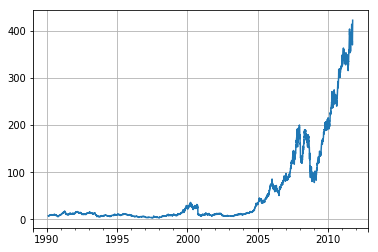

In [5]:
close_px['AAPL'].plot(grid = True)

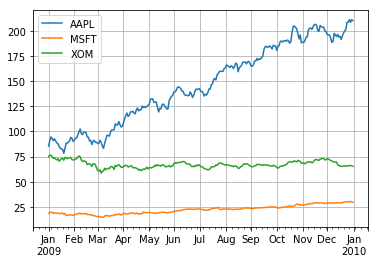

In [6]:
close_px.loc['2009'].plot(grid = True)

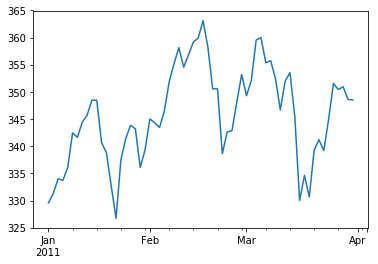

In [6]:
close_px['AAPL'].loc["01-2011":"03-2011"].plot()

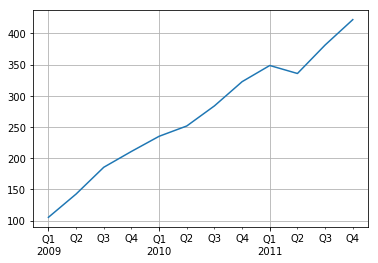

In [15]:
appl_q = close_px['AAPL'].resample("Q-DEC").ffill()
appl_q['2009':].plot(grid = True)

### Moving Window Functions

A common class of array transformations intended for time series operations are statistic and other functions evaluated over a sliding window or with exponentially decaying weights.

***Like other statistical functionsm these also automatically exclude missing data.***

`rolling_mean` is one of the simplest such functions.

It takes a TimeSeries or DataFrame along with a window(expressed as a number of periods).

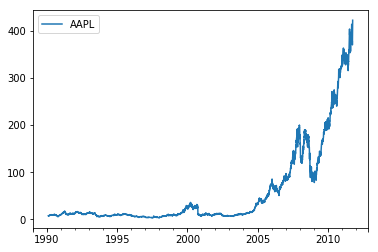

In [7]:
close_px[['AAPL']].plot()

By default functions like `rolling` require the indicated number of non-NA observations.

***This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than `window` periods of data at the begining of the time series.***

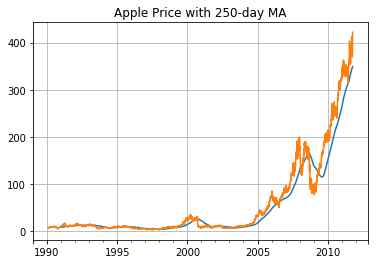

In [25]:
close_px['AAPL'].rolling(window = 250, center = False).mean().plot()
close_px['AAPL'].plot(grid = True, title = 'Apple Price with 250-day MA')

In [43]:
appl_std250 = close_px['AAPL'].rolling(window = 250, min_periods = 10).std()
print(close_px[close_px.index <= '1990-02-14']['AAPL'].std())
appl_std250[:11]

0.14818906842274157


1990-02-01         NaN
1990-02-02         NaN
1990-02-05         NaN
1990-02-06         NaN
1990-02-07         NaN
1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
Freq: B, Name: AAPL, dtype: float64

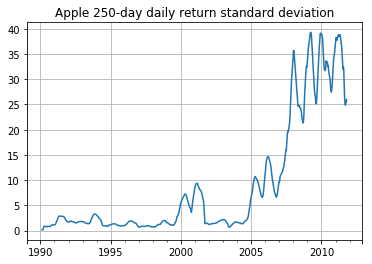

In [45]:
appl_std250.plot(grid = True, 
                 title = 'Apple 250-day daily return standard deviation')

To compute an `expanding window mean`, you can see that an expanding window is just a special case where the window is the length of the time series, but only one or more period is required to compute a value. 

In [46]:
# Define expanding mean in terms of rolling mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods = 1)

G:\Program_files2\Anaconda\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


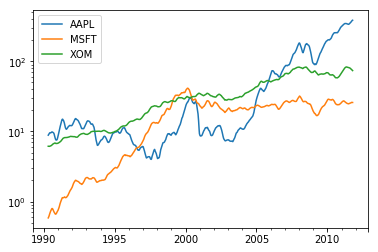

In [52]:
close_px.rolling(window = 60).mean().plot(logy = True)

### Exponentially-weighted functions

An alternative to using a static window size with equally-weighted observations is to specify a constant `decay factor` to give more weight to more recent observations.

In mathematical terms, if $ma_t$ is the moving average result at time t and x is the time series in question, each value in the reslut is computed as $ma_t = a^* ma_{t-1} + (a-1)*x_t$, where a is the decay factor.

***Since an exponentially-weighted statistic place more weight on more recent observations, it `adapts` faster to changes compared with the equal-weighted version.***

Text(0.5,1,'Exponentially-weight MA')

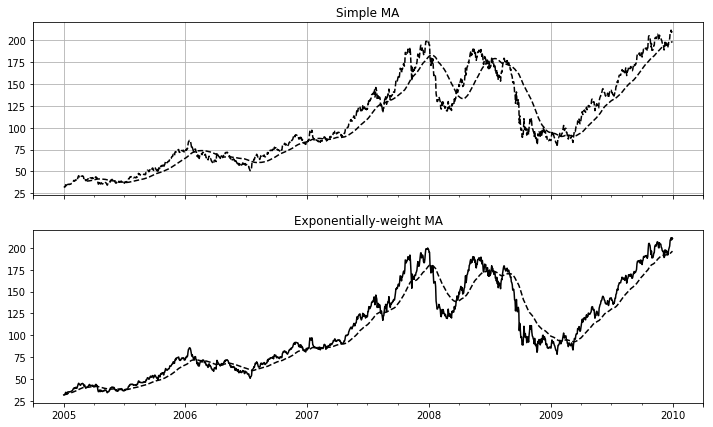

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, 
                         sharey=True, figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(window = 60, min_periods = 50).mean()
ewma60 = aapl_px.ewm(span = 60).mean()

aapl_px.plot(style = 'k--', ax = axes[0], grid = True)
ma60.plot(style = 'k--', ax = axes[0], grid = True)

aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weight MA')

### Binary Moving Window Functions

Some statistical operator, like correlation and covariance, need to operate on two time series.

In [74]:
spx_px = pd.read_csv(".\\pydata-book\\examples\\spx.csv", parse_dates = True, index_col = 0)
spx_px[:3]

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85


In [93]:
spx_rets = spx_px/spx_px.shift(1)-1 # compute percent changes
returns = close_px.pct_change()

In [80]:
spx_px.pct_change()[:3] # the same as the above 

,SPX
1990-02-01,NaN
1990-02-02,0.006478
1990-02-05,0.002810


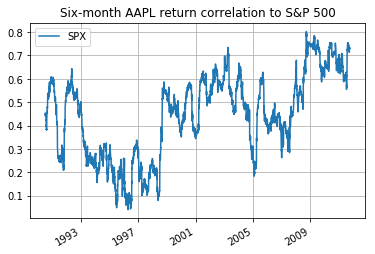

In [131]:
corr = returns['AAPL'].rolling(window = 125, min_periods = 100).corr(spx_rets)
corr.plot(grid = True, title = 'Six-month AAPL return correlation to S&P 500')

In [127]:
# need to transform to Series
spx_ser = pd.Series(spx_rets.values.flatten(), index = spx_rets.index)

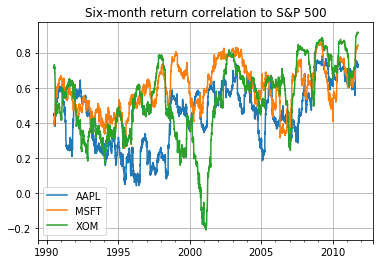

In [132]:
corr = returns.rolling(window = 125, min_periods = 100).corr(spx_ser)
corr.plot(grid = True, title = 'Six-month return correlation to S&P 500')

### User-Defined Moving Window Functions

***The `rolling_apply` function provides a means to apply an array function of your own devising over a moving window.***

In [134]:
from scipy.stats import percentileofscore

In [141]:
scrore_at_2percent = lambda x: percentileofscore(x, score = 0.02, kind = 'rank')

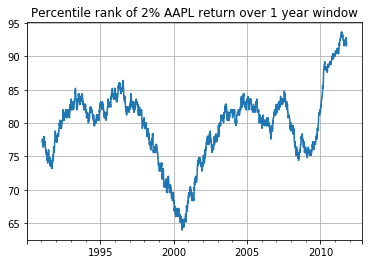

In [143]:
result = returns['AAPL'].rolling(window = 250).apply(scrore_at_2percent)
result.plot(grid = True, 
            title = 'Percentile rank of 2% AAPL return over 1 year window')

### Reference

 - ***[Difference between `asfreq` and `resample`(by stack overflow)](https://stackoverflow.com/questions/18060619/difference-between-asfreq-and-resample)***